# Bin Ware Lab 2 Titanic Project
**Author:** Bin Ware
**Date:** March 21, 2025  
**Objective:** Perform analysis on the Titanic Dataset


## Introduction: 
This notebook analyzes the Titanic dataset to explore passenger characteristics and their relationship to survival. The Titanic dataset contains information about passengers including age, sex, ticket class, fare, and whether they survived the disaster.

## Imports

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

## Section 1. Import and Inspect the Data

In [28]:
titanic = sns.load_dataset('titanic')
titanic.info()
print(titanic.head(10))
print(titanic.isnull().sum())
print(titanic.describe())
print(titanic.corr(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0 

### Reflection 1
1) **How many data instances are there?**  
   There are 891 data instances (rows) in the dataset.  
2) **How many features are there?**  
   There are 15 features (columns).  
3) **What are the names?**  
   The feature names are: `survived`, `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`, `class`, `who`, `adult_male`, `deck`, `embark_town`, `alive`, `alone`.  
4) **Are there any missing values?**  
   Yes, there are missing values: `age` (177), `embarked` (2), `deck` (688), `embark_town` (2).  
5) **Are there any non-numeric features?**  
   Yes, non-numeric features include: `sex` (object), `embarked` (object), `class` (category), `who` (object), `deck` (category), `embark_town` (object), `alive` (object).  
6) **Are the data instances sorted on any of the attributes?**  
   No, the data does not appear to be sorted on any attribute based on the first 10 rows.  
7) **What are the units of age?**  
   The units of age are years (float64 type).  
8) **What are the minimum, median, and max age?**  
   From `describe()`: Minimum = 0.42 years, Median = 28.0 years, Maximum = 80.0 years.  
9) **What two different features have the highest correlation?**  
   From `corr()`, the highest correlation (excluding self-correlations) is between `parch` and `sibsp` (0.414838), indicating family-related features are strongly related.  
10) **Are there any categorical features that might be useful for prediction?**  
    Yes, `sex`, `pclass`, and `embarked` could be useful predictors of survival based on historical context (e.g., "women and children first" and class-based evacuation priorities).

## Section 2: Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

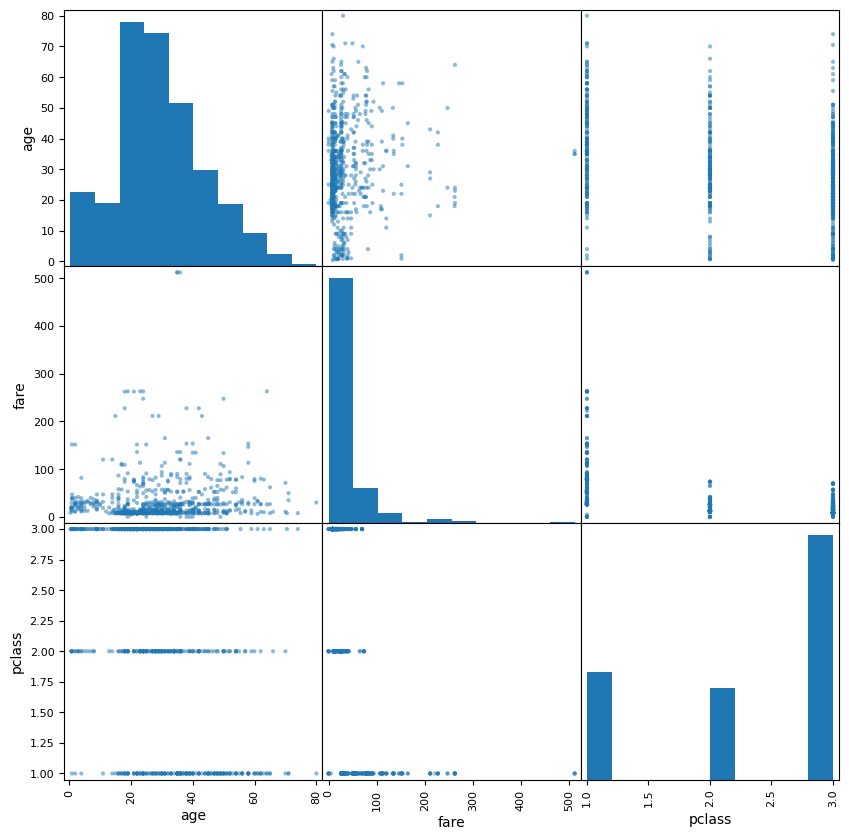

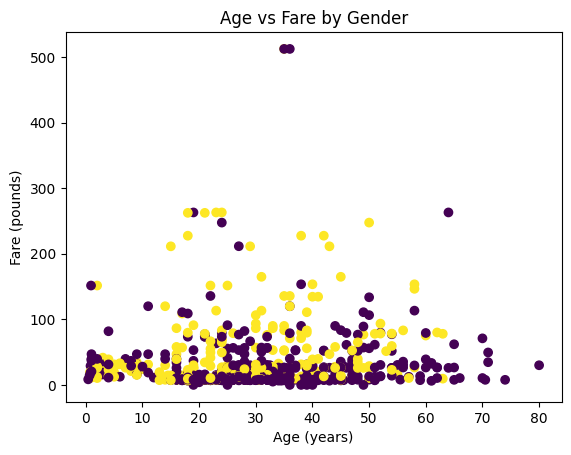

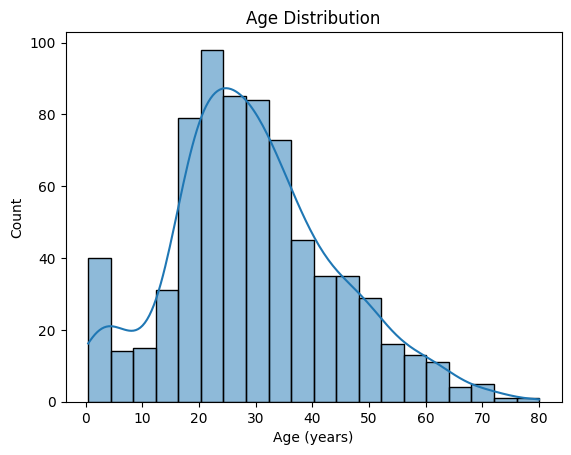

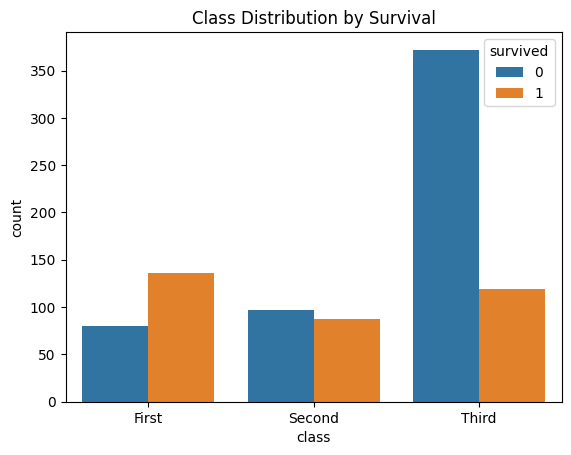

In [29]:
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))
plt.show()

plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age (years)')
plt.ylabel('Fare (pounds)')
plt.title('Age vs Fare by Gender')
plt.show()

sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.show()

sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

#### Reflection 2.1
- **What patterns or anomalies do you notice?**  
  The scatter matrix shows a right-skewed distribution for `fare`, with some extreme outliers (e.g., fares > 500). The age histogram is slightly right-skewed, with a peak around 20-30 years. The count plot reveals that first-class passengers had a higher survival rate than third-class.  
- **Do any features stand out as potential predictors?**  
  `pclass` and `sex` stand out: higher classes and females show higher survival rates in the count and scatter plots. `fare` also correlates with survival, likely as a proxy for class.  
- **Are there any visible class imbalances?**  
  Yes, third-class passengers dominate the dataset (over 50%), but their survival rate is much lower, indicating a class imbalance in survival outcomes.

### 2.2 Handle Missing Values and Clean Data

In [30]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.3 Feature Engineering

In [31]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

#### Reflection 2.3
- **Why might family size be a useful feature for predicting survival?**  
  Family size could indicate whether a passenger had support or responsibilities during evacuation. Larger families might have struggled to stay together, while solo travelers might have been more mobile, affecting survival odds.  
- **Why convert categorical data to numeric?**  
  Numeric data is required for most machine learning algorithms to process relationships and compute weights effectively. Converting `sex` and `embarked` to numbers enables models to use these features directly.

## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

**Input Features:** `age`, `fare`, `pclass`, `sex`, `family_size`  
**Target:** `survived`  
**Justification:**  
- `age`: Children may have been prioritized in lifeboats.  
- `fare`: Higher fares correlate with higher class and survival odds.  
- `pclass`: Class strongly influences survival due to lifeboat access.  
- `sex`: Females had a higher survival rate historically ("women and children first").  
- `family_size`: May reflect evacuation dynamics (e.g., alone vs. with family).

### 3.2 Define X and y

In [32]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

#### Reflection 3
- **Why are these features selected?**  
  These features capture key demographic (age, sex), socioeconomic (fare, pclass), and social (family_size) factors likely to influence survival based on historical accounts and initial data exploration.  
- **Are there any features likely to be highly predictive of survival?**  
  `sex` and `pclass` are likely highly predictive, as females and first-class passengers had significantly higher survival rates in the count plot and correlate strongly with `survived` in the correlation matrix.

## Section 4: Splitting

### 4.1 Basic Train/Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('Train size:', len(X_train))
print('Test size:', len(X_test))
print("Basic Train Survival Distribution:\n", y_train.value_counts(normalize=True))
print("Basic Test Survival Distribution:\n", y_test.value_counts(normalize=True))

Train size: 712
Test size: 179
Basic Train Survival Distribution:
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64
Basic Test Survival Distribution:
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64


### 4.2 Stratified Train/Test Split

In [34]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train_strat = X.iloc[train_indices]
    X_test_strat = X.iloc[test_indices]
    y_train_strat = y.iloc[train_indices]
    y_test_strat = y.iloc[test_indices]
print('Train size:', len(X_train_strat))
print('Test size:', len(X_test_strat))
print("Stratified Train Survival Distribution:\n", y_train_strat.value_counts(normalize=True))
print("Stratified Test Survival Distribution:\n", y_test_strat.value_counts(normalize=True))

Train size: 712
Test size: 179
Stratified Train Survival Distribution:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Stratified Test Survival Distribution:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


### 4.3 Compare Results

In [35]:
print("Original Survival Distribution:\n", y.value_counts(normalize=True))
print("Basic Train Survival Distribution:\n", y_train.value_counts(normalize=True))
print("Basic Test Survival Distribution:\n", y_test.value_counts(normalize=True))
print("Stratified Train Survival Distribution:\n", y_train_strat.value_counts(normalize=True))
print("Stratified Test Survival Distribution:\n", y_test_strat.value_counts(normalize=True))
print("Stratified Train Pclass Distribution:\n", X_train_strat['pclass'].value_counts(normalize=True))
print("Stratified Test Pclass Distribution:\n", X_test_strat['pclass'].value_counts(normalize=True))

Original Survival Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Basic Train Survival Distribution:
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64
Basic Test Survival Distribution:
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64
Stratified Train Survival Distribution:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Stratified Test Survival Distribution:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64
Stratified Train Pclass Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Stratified Test Pclass Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


#### Reflection 4
- **Why might stratification improve model performance?**  
  Stratification ensures the training and test sets reflect the original survival distribution (0.616/0.384), preventing bias from random splits that might over- or under-represent survivors. This consistency leads to more reliable model evaluation and better generalization to unseen data.

- **How close are the training and test distributions to the original dataset?**  
  The stratified split keeps survival proportions very close to the original: train (0.617/0.383) and test (0.615/0.385) deviate by <0.002 from 0.616/0.384. The basic split shows more variation: train (0.611/0.389) is off by ~0.005, and test (0.637/0.363) by ~0.021, over-representing non-survivors. For `pclass`, the stratified train set (0.562/0.228/0.211) is reasonably close to the dataset’s overall distribution, while the test set (0.508/0.302/0.190) over-represents first-class and under-represents third-class.

- **Which split method produced better class balance?**  
  The stratified split produced better balance for the target `survived`, maintaining proportions nearly identical to the original dataset. The basic split shows noticeable deviation, especially in the test set, which could skew model evaluation. For `pclass`, neither split is stratified on this feature, so the observed differences (e.g., test set skew) are incidental and not a focus of the stratification.